<a href="https://colab.research.google.com/github/Akiyoshi-Yagi/deepLearning/blob/master/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

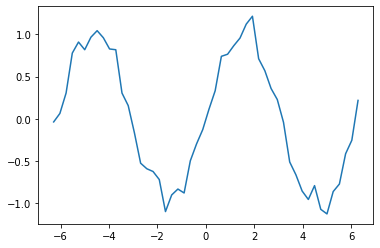

In [1]:
import numpy as np
import matplotlib.pyplot  as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data, sin_data)
plt.show()

In [4]:
'''
ここのサンプル数と時系列数の考え方は
https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf
をみるとわかりやすい！！
'''
n_rnn = 10 #時系列数(各サンプルに含まれる時系列データの数))
n_sample = len(x_data)-n_rnn #サンプル数
x = np.zeros((n_sample, n_rnn)) #入力
t = np.zeros((n_sample, n_rnn)) #正解
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]  # 時系列を入力よりも一つ後にずらす

x = x.reshape(n_sample, n_rnn, 1)  # KerasにおけるRNNでは、入力を（サンプル数、時系列の数、入力層のニューロン数）にする
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)  # 今回は入力と同じ形状
print(t.shape)
# print(x)


(40, 10, 1)
(40, 10, 1)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)




Train on 36 samples, validate on 4 samples
Epoch 1/20





36/36 [==============================] - 1s 18ms/step - loss: 1.6212 - val_loss: 0.7500
Epoch 2/20
36/36 [==============================] - 0s 583us/step - loss: 0.5195 - val_loss: 0.3332
Epoch 3/20
36/36 [==============================] - 0s 509us/step - loss: 0.2640 - val_loss: 0.2097
Epoch 4/20
36/36 [==============================] - 0s 533us/step - loss: 0.1800 - val_loss: 0.1623
Epoch 5/20
36/36 [==============================] - 0s 496us/step - loss: 0.1461 - val_loss: 0.1421
Epoch 6/20
36/36 [==============================] - 0s 503us/step - loss: 0.1290 - val_loss: 0.1255
Epoch 7/20
36/36 [==============================] - 0s 483us/step - loss: 0.1187 - val_loss: 0.1183
Epoch 8/20
36/36 [==============================] - 0s 535us/step - loss: 0.1111 - val_loss: 0.1157
Epoch 9/20
36/36 [==============================] - 0s 663us/step - loss: 0.1055 - val_loss: 0.1052
Epoch 10/20
36/36 [==============================]

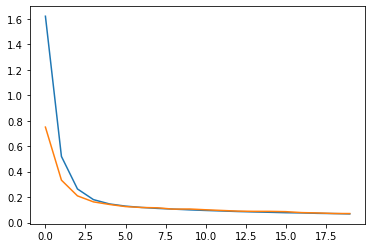

In [7]:
loss = history.history["loss"]
v_loss = history.history["val_loss"]

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(v_loss)), v_loss)
plt.show()



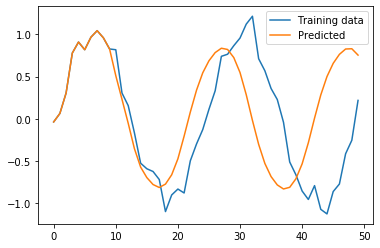

In [8]:
predicted = x[0].reshape(-1)  # 最初の入力。reshape(-1)で一次元のベクトルにする。

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))  # 直近のデータを使って予測を行う
    predicted = np.append(predicted, y[0][n_rnn-1][0])  # 出力の最後の結果をpredictedに追加する

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()